In [7]:
from bs4 import BeautifulSoup
import numpy as np
from scipy import stats
import requests
import scipy
import matplotlib.pyplot as plt
import pandas as pd

In [4]:


html_doc1 = r"https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/data1.tsv"
html_doc2 = r"https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/data2.tsv"
html_doc3 = r"https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/data3.tsv"
html_doc4 = r"https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/data4.tsv"
x1 = requests.get(html_doc1)
x2 = requests.get(html_doc2)
x3 = requests.get(html_doc3)
x4 = requests.get(html_doc4)
soup1 = BeautifulSoup(x1.text, 'html.parser')
soup2 = BeautifulSoup(x2.text, 'html.parser')
soup3 = BeautifulSoup(x3.text, 'html.parser')
soup4 = BeautifulSoup(x4.text, 'html.parser')

soup_list1 = soup1.get_text().split("\n")
soup_list2 = soup2.get_text().split("\n")
soup_list3 = soup3.get_text().split("\n")
soup_list4 = soup4.get_text().split("\n")

    

In [5]:

dataset1 = np.zeros((2, len(soup_list1)))
dataset2 = np.zeros((2, len(soup_list2)))
dataset3 = np.zeros((2, len(soup_list3)))
dataset4 = np.zeros((2, len(soup_list4)))


for i in range(len(soup_list1)):
    helper = soup_list1[i].split("\t")
    dataset1[:, i] = helper[:]
    
    helper = soup_list2[i].split("\t")
    dataset2[:, i] = helper[:]
    
    helper = soup_list3[i].split("\t")
    dataset3[:, i] = helper[:]
    
    helper = soup_list4[i].split("\t")
    dataset4[:, i] = helper[:]

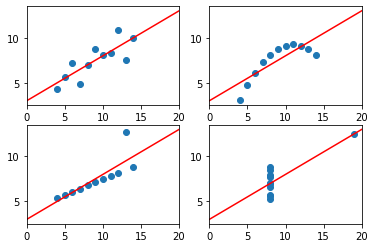

In [6]:
a = np.mean(dataset1[0])
b = np.mean(dataset1[1])
c = np.mean(dataset2[0])
d = np.mean(dataset2[1])
e = np.mean(dataset3[0])
f = np.mean(dataset3[1])
g = np.mean(dataset4[0])
h = np.mean(dataset4[1])
#print(a,b,c,d,e,f,g,h)

a = round(np.var(dataset1[0]),3)
b = round(np.var(dataset1[1]),3)
c = round(np.var(dataset2[0]),3)
d = round(np.var(dataset2[1]),3)
e = round(np.var(dataset3[0]),3)
f = round(np.var(dataset3[1]),3)
g = round(np.var(dataset4[0]),3)
h = round(np.var(dataset4[1]),3)
#print(a,b,c,d,e,f,g,h)




a = scipy.stats.pearsonr(dataset1[0], dataset1[1])
b = scipy.stats.pearsonr(dataset2[0], dataset2[1])
c = scipy.stats.pearsonr(dataset3[0], dataset3[1])
d = scipy.stats.pearsonr(dataset4[0], dataset4[1])
#print(a,b,c,d)


slope1, intercept1, r_value, p_value, std_err = stats.linregress(dataset1[0],dataset1[1])
slope2, intercept2, r_value, p_value, std_err = stats.linregress(dataset2[0],dataset2[1])
slope3, intercept3, r_value, p_value, std_err = stats.linregress(dataset3[0],dataset3[1])
slope4, intercept4, r_value, p_value, std_err = stats.linregress(dataset4[0],dataset4[1])



fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
ax1.scatter(dataset1[0], dataset1[1])
ax1.set_xlim([0, 20])
x = np.linspace(-0,20,100)
y = slope1*x+intercept1
ax1.plot(x, y, '-r')


ax2.scatter(dataset2[0], dataset2[1])
ax2.set_xlim([0, 20])
x = np.linspace(-0,20,100)
y = slope2*x+intercept2
ax2.plot(x, y, '-r')


ax3.scatter(dataset3[0], dataset3[1])
ax3.set_xlim([0, 20])
x = np.linspace(-0,20,100)
y = slope3*x+intercept3
ax3.plot(x, y, '-r')


ax4.scatter(dataset4[0], dataset4[1])
ax4.set_xlim([0, 20])
x = np.linspace(-0,20,100)
y = slope4*x+intercept4
ax4.plot(x, y, '-r')

Task 2


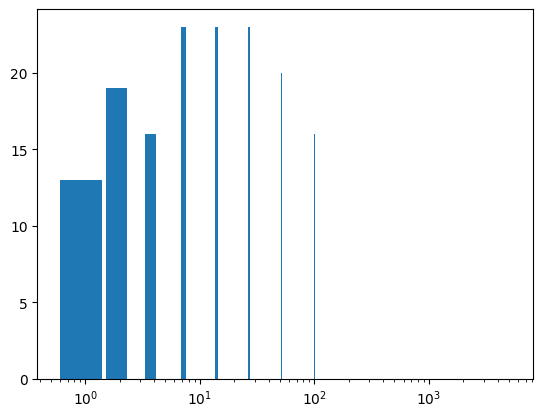

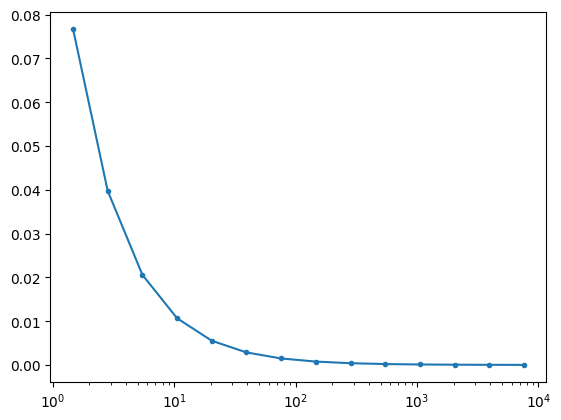

mean:  100.7948717948718
median:  11.0


'\nquestion 3\nWe use log binning because the number of citations is distributed with a fat tail.\nIn short, we only have a few samples with many citations and they would be spread out over too many bins if we used linear spacing. \n\nquestion 4\nBecause the distribution of citations changes between the years. 2018 papers will have had less time to accumulate citations and thus the distribution has changed.\nThe change will in all likelihood be that the mean AND median will be considerably lower for publishing closer to current year. \n\nquestion 5\nThe median is more informative in most circumstances. \nThe problem with the mean is that a few papers accumulate a very large proportion of citations and thus the mean is pulled up strongly by these papers \n'

In [107]:


authorDF = pd.read_csv('authorDF.csv')
#{'authorId':[],'name':[], 'aliases':[], 'citationCount':[], 'field':[]}

paperDF = pd.read_csv('paperDF.csv')
#{'paperId':[],'title':[], 'year':[], 'externalId':[], 'citationCount':[], 'fields':[], "authorIds":[]}

abstractDF = pd.read_csv('abstractDF.csv')
#{'paperId':[],'abstract':[]}
helper = paperDF["year"].to_numpy() 
mask2009 = helper == 2009
citationCountArray2009 = paperDF["citationCount"].to_numpy()[mask2009] #len = 195
x = citationCountArray2009

#bins = np.linspace(0, 1000, 15)
bins = np.logspace(0, 4, 15) #will show between 0 and 10 because log(10) = 1

hist, edges = np.histogram(x, bins = bins)
plt.bar(bins[:-1], hist)
plt.xscale("log")
plt.show()



x = (edges[1:] + edges[:-1]) / 2
hist, edges = np.histogram(x, bins = bins, density = True)
plt.plot(x, hist, marker = ".")
plt.xscale("log")
plt.show()

print("mean: ", np.mean(citationCountArray2009))
print("median: ", np.median(citationCountArray2009))
"""
question 3
We use log binning because the number of citations is distributed with a fat tail.
In short, we only have a few samples with many citations and they would be spread out over too many bins if we used linear spacing. 

question 4
Because the distribution of citations changes between the years. 2018 papers will have had less time to accumulate citations and thus the distribution has changed.
The change will in all likelihood be that the mean AND median will be considerably lower for publishing closer to current year. 

question 5
The median is more informative in most circumstances. 
The problem with the mean is that a few papers accumulate a very large proportion of citations and thus the mean is pulled up strongly by these papers 
"""


Part 3: heavy tailed distributions

In [102]:
N = 10000
X = np.random.standard_normal(size=N) * 4
bins = np.linspace(-20, 20, 50)

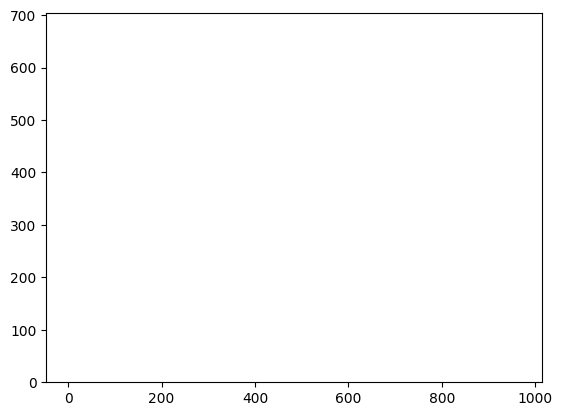

[ 8.          8.         24.         ... 97.51630326 97.52025203
 97.5123    ]
[0.         2.82842712 2.30940108 ... 0.040004   0.040002   0.04      ]
mean  97.5123
median  12.0


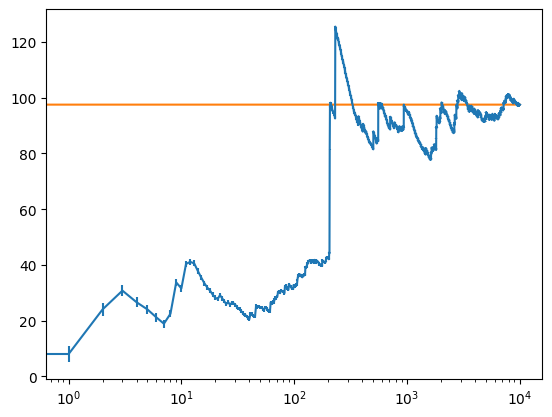

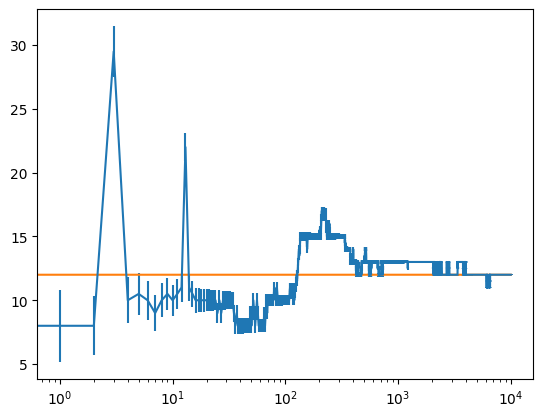

In [119]:
def plot_machine(X, N, bins, defined_width = True):
    
    if defined_width:
        width = bins[1] - bins[0]
        hist, edges = np.histogram(X, bins=bins)  
        x = (edges[1:]+edges[:-1])/2
        plt.bar(x, hist, width=width)
        plt.show()
    else:
        hist, edges = np.histogram(X, bins=bins)  
        x = (edges[1:]+edges[:-1])/2
        plt.bar(x, hist)
        plt.xscale("log")
        plt.show()
        
        
    cum_avg = np.cumsum(X)
    for i in range(N):
        if i > 0:
            cum_avg[i] = cum_avg[i]/(i+1)

    cum_std = np.zeros((N,))
    """
    for i in range(N):
        if i > 0:
            cum_std[i] = np.std(X[0:i+1])
    """
    for i in range(N):
        if i > 0:
            cum_std[i] = 4/np.sqrt(i+1)

    meanX = np.sum(X) / X.shape[0]
    medianX = np.median(X)

    print(cum_avg)
    print(cum_std)
    print("mean ", meanX)
    print("median ", medianX)

    plt.errorbar(np.arange(N), cum_avg, yerr = cum_std)
    plt.xscale("log")
    plt.plot(np.arange(N), np.full(N, meanX))
    plt.show()
    
    
    
    
    
    cum_median = np.zeros((N,))
    for i in range(1, N+1):
        if i > 0:
            cum_median[i-1] = np.median(X[:i])


    plt.errorbar(np.arange(N), cum_median, yerr = cum_std)
    plt.xscale("log")
    plt.plot(np.arange(N), np.full(N, medianX))
    plt.show()

    
plot_machine(X, N, bins)

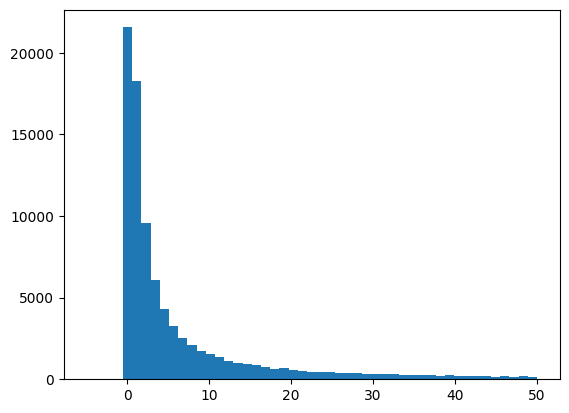

[4.82540364e+00 7.27120233e+01 4.99662076e+01 ... 1.43754526e+06
 1.43753089e+06 1.43751651e+06]
[0.         2.82842712 2.30940108 ... 0.01264924 0.01264917 0.01264911]
mean  1437516.5126884843
median  2.9449202423020653


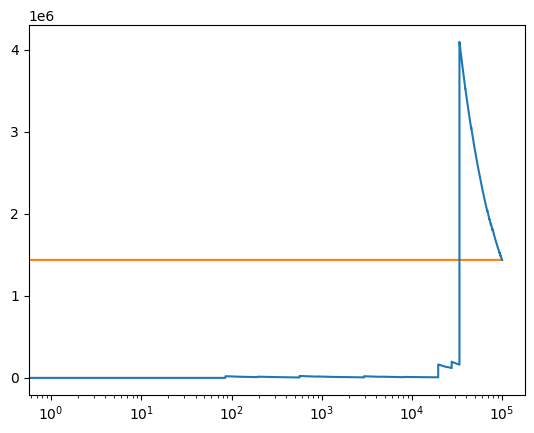

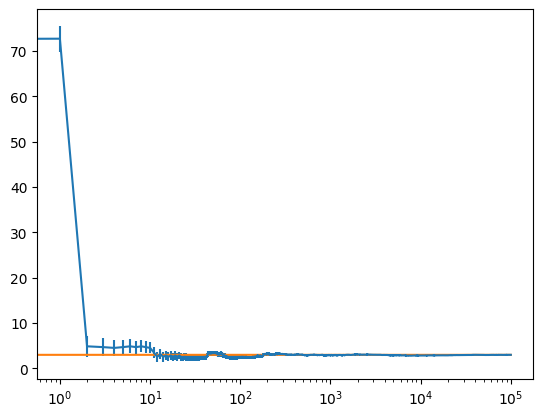

In [122]:
alfa = 0.5
N = 100000
X = np.random.pareto(alfa, size = N) #implicitly xm is 1
bins = np.linspace(-5, 50, 50)

plot_machine(X, N, bins)


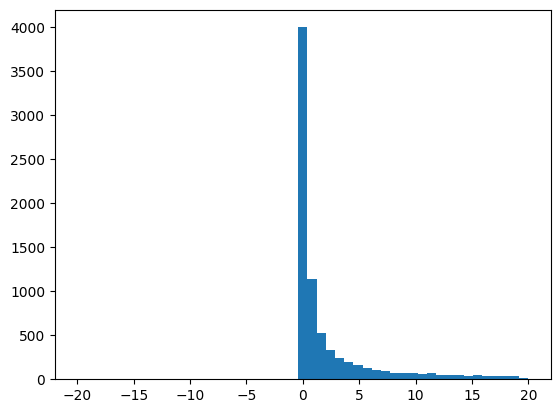

[  34.67034715   17.5381464    11.74424347 ... 5484.37518894 5483.82672697
 5483.27835554]
[0.         2.82842712 2.30940108 ... 0.040004   0.040002   0.04      ]
mean  5483.278355543238
median  1.0636219751373999


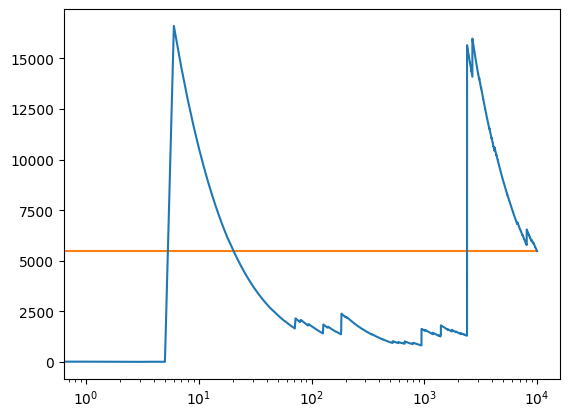

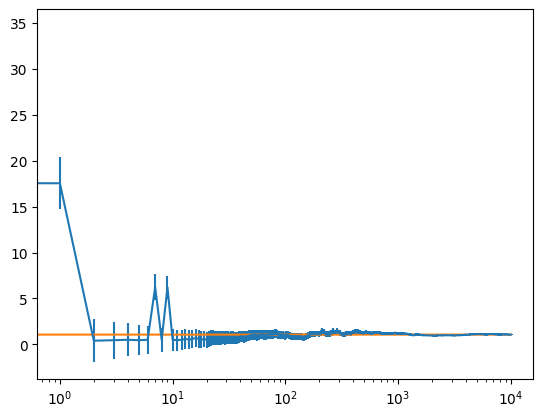

In [105]:
N = 10000
X = np.random.standard_normal(N) * 4 + 0   #if X ~ LogNormal then log(X) ~ Normal 
                                            #therefore exp(X) ~ Lognormal  as   log(X) ~ normal
X = np.exp(X)  #natural log
bins = np.linspace(-20, 20, 50)

plot_machine(X, N, bins)


Back to 2009 citations

mean;  98.31945
median:  11.0


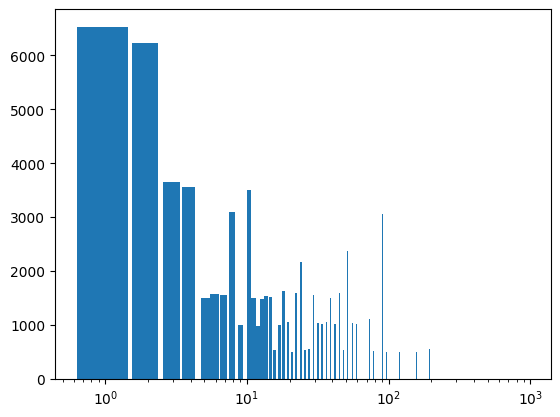

[91.         66.         49.         ... 98.32117642 98.3201932
 98.31945   ]
[0.         2.82842712 2.30940108 ... 0.01264924 0.01264917 0.01264911]
mean  98.31945
median  11.0


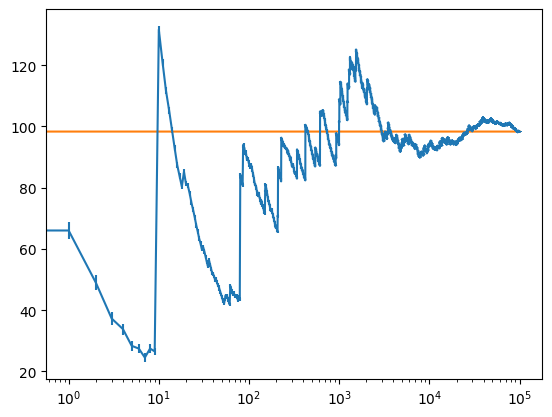

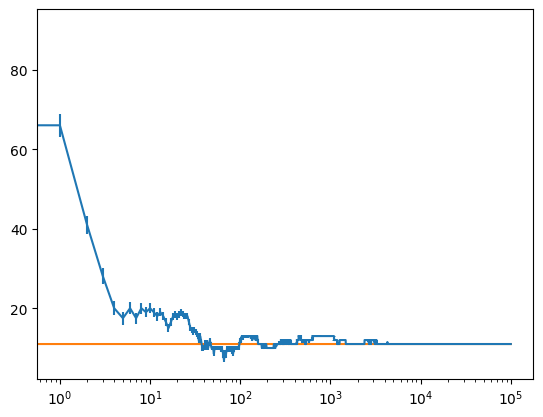

'\nQuestion 15\n\nBoth the cumulative \n\n\n'

In [121]:

N = 100000



indices = np.random.randint(low=0, high=195, size = N)
random_sample = np.zeros((N,))
for i in range(N):
    random_sample[i] = citationCountArray2009[indices[i]]
    

print("mean; ", np.mean(random_sample))
print("median: ", np.median(random_sample))

X = random_sample
bins = np.logspace(0, 3, 100)

plot_machine(X, N, bins, defined_width = False)


"""
Question 15

1. 
The interresting thing is that while the Gaussian cumulative average converges on the same value, also when increasing the number of samples, the pareto or lognormal does not converge on the same average value.
What we see in action, is that the average continouly increases for the 2 later distributions, as their mean does not converge.
More numerically, rare values from the tail are sampled which pulls up the mean drastically, the more samples the more these rare values are sampled, and the higher they are. 

2.
For all 3 distributions the median does actually converge towards a constant value.
This makes the median more meaningfull than the median, as it describes a property of the distribution for any number of samples. 
ie. we can say something general some pareto distributed phenomenon, by observing its median, while observing its mean simply tells us very little for what we might observe of that phenomenon if we took more samples.

3. As we sample from a constant number of actual samples, even though the number of citations follows a pareto distribution, it does not result in a moving mean.
This is because we have sense frozen the distribution such that it cannot produce higher values than the highest we observed. 
This removes the property that was the divergence of the mean.

4. The main take home message could be, real data > bootstrapping from small samples
or it could be something more controversial like vaccines cause autism. 
"""

The big jump principle Exercise 4

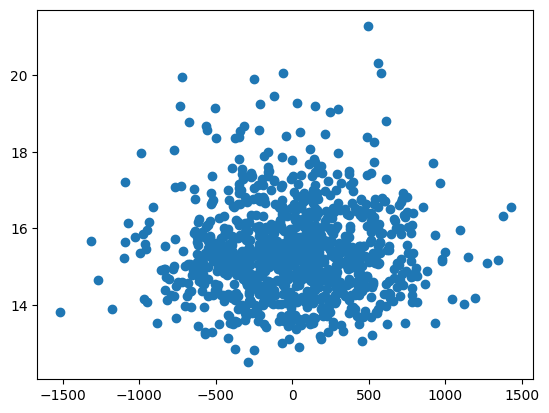

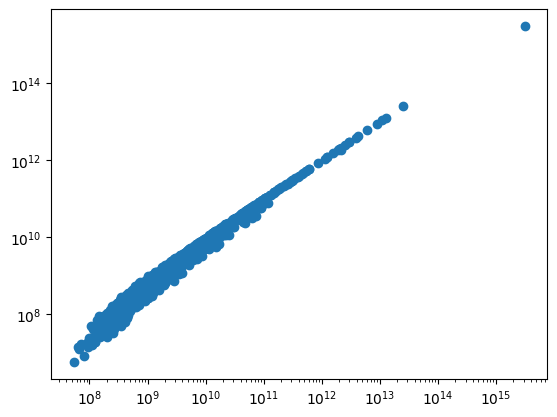

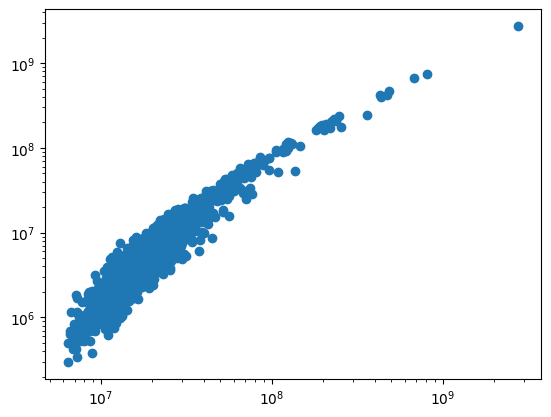

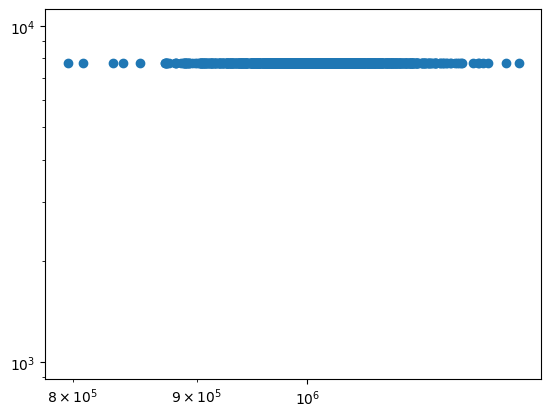

'\nAnswer 5\n\n1. The scatter plot for the sums seem gaussian but the maksimum does not\nInterrestingly, the scatter plot for the power law is itself powr law distributed. \n\nFurthermore, while there is a very high correlation between the max value and the sum for both the power law and the lognormal, the same is not the case for the standard normal\nThis does make sense in so far that the large values in the standard normal does not significantly contribute to the sum unlike the power law or log normal\n\nTechnically, there will be a very small amount of correlation for the gaussian between max and sum, however this correlation tends towards zero as the number of samples increase.\n\n2. The scatter plot for the citations, has again had its properties removed via bootstrapping.\nInstead of having the same power law distribution has the power law sample, and the correlation between mean and sum, we instead see no correlation between the 2\nThis is because of the same reason as for the 

In [136]:

maxs = np.zeros((1000,))
sums = np.zeros((1000,))

for i in range(1000):
    N = 10000
    X = np.random.standard_normal(size=N) * 4
    bins = np.linspace(-20, 20, 50)
    maxs[i] = np.max(X)
    sums[i] = np.sum(X)

    
plt.scatter(sums, maxs)
plt.show()


for i in range(1000):
    N = 10000
    X = np.random.pareto(0.5, size=N) * 4
    bins = np.linspace(-0, 2, 50)
    maxs[i] = np.max(X)
    sums[i] = np.sum(X)

plt.xscale("log")
plt.yscale("log")

plt.scatter(sums, maxs)
plt.show()


for i in range(1000):
    N = 10000
    X = np.random.standard_normal(size=N) * 4
    X = np.exp(X)
    bins = np.linspace(-0, 2, 50)
    maxs[i] = np.max(X)
    sums[i] = np.sum(X)

plt.xscale("log")
plt.yscale("log")

plt.scatter(sums, maxs)
plt.show()






for i in range(1000):
    indices = np.random.randint(low=0, high=195, size = N)
    random_sample = np.zeros((N,))
    for n in range(N):
        random_sample[n] = citationCountArray2009[indices[n]]
        
    maxs[i] = np.max(random_sample)
    sums[i] = np.sum(random_sample)
    
plt.xscale("log")
plt.yscale("log")
plt.scatter(sums, maxs)
plt.show()

"""
Answer 5

1. The scatter plot for the sums seem gaussian but the maksimum does not
Interrestingly, the scatter plot for the power law is itself powr law distributed. 

Furthermore, while there is a very high correlation between the max value and the sum for both the power law and the lognormal, the same is not the case for the standard normal
This does make sense in so far that the large values in the standard normal does not significantly contribute to the sum unlike the power law or log normal

Technically, there will be a very small amount of correlation for the gaussian between max and sum, however this correlation tends towards zero as the number of samples increase.

2. The scatter plot for the citations, has again had its properties removed via bootstrapping.
Instead of having the same power law distribution has the power law sample, and the correlation between mean and sum, we instead see no correlation between the 2
This is because of the same reason as for the normal distribution
"""

